# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Efficient Frontier

Investors have different appetites for risk

Some favour safer returns at the expense of less change of exceptional returns.

Portfolio theory is that some risk can be mitigated by mixing ecurities together

Can allow investors to earn higher rate of return whilst reducing risk

## Load in some Data

1 years worth

Approx 252 days

In [2]:
stocks = 'AAPL GLD'.split()
df = pdr.get_data_yahoo(stocks, '2019')['Adj Close']
df = df[-253:]

df_vol = pd.DataFrame()

for stock in stocks:
    if stock not in df_vol:
        df_vol[stock] = np.log(df[stock]).diff() 

In [3]:
df_vol


,AAPL,GLD
Date,,
2021-08-17,NaN,NaN
2021-08-18,-0.025832,0.000778
2021-08-19,0.002320,-0.002937
2021-08-20,0.010106,0.000540
2021-08-23,0.010205,0.012104
...,...,...
2022-08-11,-0.004441,-0.002642
2022-08-12,0.021199,0.009156
2022-08-15,0.006314,-0.012951


## Annualize variances

Multiply daily variance by 252

In [4]:
var_aapl = df_vol['AAPL'].var() * 252
var_gld = df_vol['GLD'].var() * 252
print(var_aapl)
print(var_gld)

0.09323960217746112
0.019096331544747554


## Construct a Portfolio

Weights - 90% apple, 10% gold

Expected Returns -  (Apple 14%), Gold(7%)

In [5]:
w_aapl =  .9
w_gld = 1 - w_aapl
exp_aapl = .14
exp_gld = .07

In [6]:
exp = w_aapl * exp_aapl + w_gld * exp_gld
exp

0.13300000000000003

### Anualize the covariance

In [7]:
np.cov(df_vol['AAPL'][1:], df_vol['GLD'][1:])[1,0]

-1.4631921108850263e-05

In [8]:
cov = np.cov(df_vol['AAPL'][1:], df_vol['GLD'][1:])[0,1] * 252
cov

-0.003687244119430266

### Calculate std of Portfolio

Based on weights (90% & 10%)

$ \large std_{port} = \sqrt{var_{aapl}.(weight_{aapl})^2 + var_{gld}.(weight_{gld})^2 + 2. cov.weight_{aapl}.weight_{gld} }$

In [9]:
port_std = np.sqrt(var_aapl * w_aapl **2 + var_gld * w_gld ** 2 + 2 * cov * w_aapl * w_gld)
port_std

0.27395499108009247

## Analyse Results

With 90% Apple & 10% gold

- Expect return is 13.3%
- Expected volatility is 36.7%

Might consider this too high a risk

## Repeat

But with difference weights

e.g. weights of 0%, 5%, 10%, 155, ... 100%

In [10]:
df_effic = pd.DataFrame({'weight_aapl':np.zeros(21), 'exp_ret': np.zeros(21), 'std': np.zeros(21)})

df_effic

,weight_aapl,exp_ret,std
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [11]:
df_effic = pd.DataFrame({'weight_aapl':np.zeros(21), 'exp_ret': np.zeros(21), 'std': np.zeros(21)})

w_aapl = 0.0
for weight in range(21):
    df_effic['weight_aapl'][weight] = w_aapl
    df_effic['exp_ret'][weight] = w_aapl * exp_aapl + (1-w_aapl) * exp_gld
    df_effic['std'][weight] = np.sqrt(var_aapl * w_aapl ** 2 + var_gld * (1-w_aapl) ** 2 + cov * w_aapl * (1 - w_aapl))
    w_aapl = w_aapl + .05

df_effic

,weight_aapl,exp_ret,std
0,0.00,0.0700,0.138189
1,0.05,0.0735,0.131501
2,0.10,0.0770,0.126762
3,0.15,0.0805,0.124197
4,0.20,0.0840,0.123941
5,0.25,0.0875,0.126007
6,0.30,0.0910,0.130286
7,0.35,0.0945,0.136569
8,0.40,0.0980,0.144596
9,0.45,0.1015,0.154094


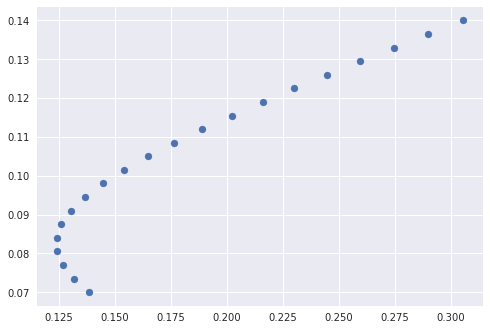

In [12]:
with plt.style.context('seaborn'):
    plt.scatter(df_effic['std'],df_effic['exp_ret'])